In [75]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
df = pd.read_csv("E:\Protfolio\Depression Data Analysis Using 2012-2018 California Dataset/adult-depression-lghc-indicator-24.csv")

In [77]:
df.head(20)

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
5,2012,Race-Ethnicity,Hispanic,412,923174.0,9.98,8.91,11.05
6,2012,Race-Ethnicity,Asian/Pacific Islander,61,220418.0,5.48,3.92,7.03
7,2012,Race-Ethnicity,Other,36,107786.0,17.34,11.09,23.60
8,2012,Education,No High School Diploma,282,579047.0,14.43,12.60,16.26
9,2012,Education,High School Graduate or GED Certificate,337,665672.0,11.44,9.98,12.89


In [78]:
df=df.drop(['Strata Name', 'Weighted Frequency','Lower 95% CL','Upper 95% CL'],axis=1)
df.head(10)

,Year,Strata,Frequency,Percent
0,2012,Total,1920,11.74
1,2012,Sex,561,8.12
2,2012,Sex,1359,15.25
3,2012,Race-Ethnicity,1314,14.57
4,2012,Race-Ethnicity,97,13.54
5,2012,Race-Ethnicity,412,9.98
6,2012,Race-Ethnicity,61,5.48
7,2012,Race-Ethnicity,36,17.34
8,2012,Education,282,14.43
9,2012,Education,337,11.44


In [79]:
year_total=df.loc[df['Strata'] == 'Total']

In [80]:
year_total

,Year,Strata,Frequency,Percent
0,2012,Total,1920,11.74
23,2013,Total,1689,13.08
46,2014,Total,1309,13.30
69,2015,Total,1848,12.92
92,2016,Total,1645,13.77
115,2017,Total,1550,19.04
138,2018,Total,1964,17.78


In [104]:
fig = px.pie(year_total,  values='Frequency',
             names='Year', color_discrete_sequence=px.colors.sequential.Magma_r,
            title='Percentage of Frecuency per Year')
fig.show()

In [111]:
data= year_total[['Year','Percent']]
data

,Year,Percent
0,2012,11.74
23,2013,13.08
46,2014,13.30
69,2015,12.92
92,2016,13.77
115,2017,19.04
138,2018,17.78


<IPython.core.display.Javascript object>


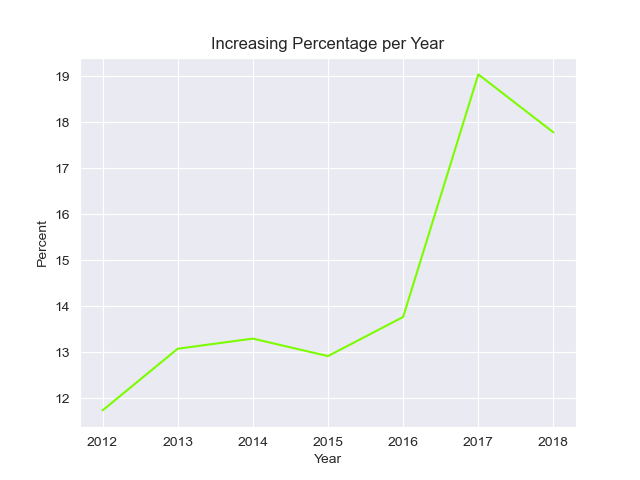

[Text(0.5, 1.0, 'Increasing Percentage per Year')]

In [125]:
sns.set_style("darkgrid")
sns.lineplot(data=data, x="Year", y="Percent",markers=True,color='lawngreen').set(title='Increasing Percentage per Year')

In [82]:
df_reason= df[['Strata','Frequency']]

In [83]:
df_reason.head(20)

,Strata,Frequency
0,Total,1920
1,Sex,561
2,Sex,1359
3,Race-Ethnicity,1314
4,Race-Ethnicity,97
5,Race-Ethnicity,412
6,Race-Ethnicity,61
7,Race-Ethnicity,36
8,Education,282
9,Education,337


In [101]:
a=df_reason.groupby(['Strata']).sum().reset_index()
a=a[a.Strata != 'Total']
a

,Strata,Frequency
0,Age,11925
1,Education,11283
2,Income,10270
3,Race-Ethnicity,11866
4,Sex,11925


In [106]:
fig = px.pie(a,values='Frequency',names='Strata',
              color_discrete_sequence=px.colors.sequential.RdBu,
            title='Reason of Depression')
fig.show()
